<a href="https://colab.research.google.com/github/MaxwellBastos/sebank/blob/main/ML_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avalição de Crédito de Risco
Dificuldades com organização financeira é um problema constante que acaba afetando grande parte da população. Isso consequentemente leva as altas taxas de inadimplência enfrentadas pelos bancos perante seus clientes.


No entanto, graças ao desenvolvimento de técnicas de aprendizado de máquina, machine learning (ML), podemos amenizar esse impacto com grande efetividade. Isso consiste em avaliar previamente os clientes mais aptos a manterem a constância de seus pagamentos, para então decidir o concedimento do crédito, empréstimo e/ou outros benefícios. Porém, temos que levar em conta o grande volume de dados gerados e as quantidades altas de clientes, para isso precisamos automatizar ao máximo esse processo sem perder sua efetividade ou cometer injustiças, e é aqui que o Machine Learning entra.


# O banco e a solução do problema
Para simular e contextualizar nosso problema, criamos um banco fictício chamado "sebank" que está passando por problemas de altas taxas de inadimplência e para evitar problemas como esse, nosso objetivo é criar um algoritmo de Machine Learning capaz de classificar pessoas que arcarão com suas dívidas em caso de aprovação de créditos e empréstimos.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [3]:
df.shape

(45000, 43)

Algumas conclusões iniciais que podem ser destacadas a respeito desse análise inicial:

* Existe uma coluna id, anônima, que representa um identificador único do 
cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.
* A variável alvo para analisar o risco de default (inadimplência) está na coluna target_default.
* As colunas ['score_3', 'score_4', 'score_5'] são numéricas e as colunas ['score_1', 'score_2'] estão codificadas de alguma maneira. Teremos que verificar a frente se existe uma quantidade de classes que possa ser convertida em informação útil.
* existem outras variáveis que apresentam algum tipo de codificação, como ['reason', 'state', 'zip', 'channel', 'job_name', 'real_state'] que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.
* A coluna profile_tags contém um dicionário com tags atribuídas a cada cliente, aparentemente.
* A coluna target_fraud seria a variável alvo de outro modelo para este mesmo dataset, onde o objetivo seria a detecção de fraude.
* A coluna lat_lon está em formato string contendo uma tupla com as coordenadas.





In [4]:
# ver resumo estatístico do dados numéricos
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [5]:
df.describe().shape

(8, 22)

In [6]:
print(f'Tipos das variáveis:\n\n {df.dtypes}')

Tipos das variáveis:

 ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip              

In [7]:
# Soma dos valores ausentes 
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

É possível notar que mais da metade dos dados possuem valores ausentes. A variável `target_fraud`, que mais possui faltantes, não demonstra nenhuma utilidade para essa análise, uma vez que nosso missão **não** é identificar fraudes bancárias, que difere da análise de risco. 

In [8]:
# Verificando valores únicos:
df.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



 Proporção entre inadimplentes:
 False    0.779556
True     0.148022
Name: target_default, dtype: float64


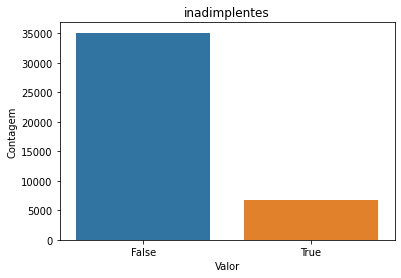

In [9]:
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title('inadimplentes')
ax.set_xlabel('Valor')
ax.set_ylabel('Contagem')

print(f'''\n Proporção entre inadimplentes:\n {df['target_default'].value_counts() / df.shape[0]}''');

In [10]:
# Criando uma cópia do Dataframe para realizar as devidas limpezas e alterações
df_cp = df.copy()

df_cp['reported_income'] = df_cp['reported_income'].replace(np.inf, np.nan)

# Excluindo colunas desnecessárias
df_cp.drop(labels=['ids', 'target_fraud',
                    'external_data_provider_credit_checks_last_2_year',
                    'channel', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 
                   'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags', 'application_time_applied', 'email', 
                   'marketing_channel','profile_phone_number', 'shipping_state'], axis=1, inplace=True)

# Substituindo o valor -999 por NaN, na coluna 'external_data_provider_email_seen_before'
df_cp.loc[df_cp['external_data_provider_email_seen_before'] == -999.0, 'external_data_provider_email_seen_before'] = np.nan

# Eliminando valores ausentes em "target_default"
df_cp.dropna(subset=['target_default'], inplace=True)

df_cp['target_default'].head(20)

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
16    False
17    False
18    False
19    False
20    False
Name: target_default, dtype: object

In [11]:
num_df = df_cp.select_dtypes(exclude='object').columns
cat_df = df_cp.select_dtypes(include='object').columns

# substituição de valores ausentes
df_cp.last_amount_borrowed.fillna(value=0, inplace=True)
df_cp.last_borrowed_in_months.fillna(value=0, inplace=True)
df_cp.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_cp.loc[:,num_df])
df_cp.loc[:,num_df] = imputer.transform(df_cp.loc[:,num_df])

# variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_cp.loc[:,cat_df])
df_cp.loc[:,cat_df] = imputer.transform(df_cp.loc[:,cat_df])

In [12]:
df_cp.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [13]:
from sklearn.preprocessing import StandardScaler # normalizar as colunas numéricas

scaled_df = df_cp.copy()
num_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns
  
scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)


In [14]:
from sklearn.preprocessing import LabelEncoder

encoded_df = scaled_df.copy()
# extrair as colunas categóricas
cat_cols = encoded_df.select_dtypes('object').columns

# codificar cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# instanciando o modelo e treinando o mesmo
ml_model = XGBClassifier(learning_rate=0.01, n_estimators=1000,
                         max_depth=3, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42)
ml_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.1, gamma=1, learning_rate=0.01,
              n_estimators=1000, random_state=42, subsample=0.9)

In [19]:
# previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)

# ver performance do algoritmo
print("\nResultado da acurácia::")
print (accuracy_score(y_test, y_pred))


Resultado da acurácia::
0.8357422342889084
